# Data Pre-processing


In [97]:
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv('Q1_property.csv', sep=',')

df = df[df['city'] == 'Lahore']

df


,property_id,location_id,page_url,property_type,price,location,city,province_name,latitude,longitude,baths,area,purpose,bedrooms,date_added,agency,agent
0,347795,8,https://www.zameen.com/Property/lahore_model_t...,House,220000000,Model Town,Lahore,Punjab,31.483869,74.325686,0.0,6 Kanal,For Sale,0.0,7/17/2019,Real Biz International,Usama Khan
1,482892,48,https://www.zameen.com/Property/lahore_multan_...,House,40000000,Multan Road,Lahore,Punjab,31.431593,74.179980,5.0,1 Kanal,For Sale,5.0,10/6/2018,Khan Estate,mohsinkhan and B
2,555962,75,https://www.zameen.com/Property/eden_eden_aven...,House,9500000,Eden,Lahore,Punjab,31.499348,74.416959,0.0,9 Marla,For Sale,3.0,7/3/2019,Shahum Estate 2,Babar Hameed
3,562843,3821,https://www.zameen.com/Property/gulberg_2_gulb...,House,125000000,Gulberg,Lahore,Punjab,31.522069,74.355512,7.0,1 Kanal,For Sale,8.0,4/4/2019,NaN,NaN
4,686990,3522,https://www.zameen.com/Property/allama_iqbal_t...,House,21000000,Allama Iqbal Town,Lahore,Punjab,31.506483,74.286017,5.0,11 Marla,For Sale,6.0,4/4/2019,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190759,17468968,1587,https://www.zameen.com/Property/dha_phase_3_dh...,Upper Portion,125000,DHA Defence,Lahore,Punjab,31.470949,74.375038,0.0,2 Kanal,For Rent,4.0,7/24/2019,M Ahmad Associates,Rizwan Saeed
190760,17468985,1602,https://www.zameen.com/Property/dha_phase_5_dh...,House,185000,DHA Defence,Lahore,Punjab,31.460919,74.410830,6.0,1 Kanal,For Rent,5.0,7/24/2019,SM Builders & Real Estate Consultants,Ch Umar
190761,17469039,1607,https://www.zameen.com/Property/dha_phase_5_dh...,House,150000,DHA Defence,Lahore,Punjab,31.463665,74.400616,5.0,10 Marla,For Rent,4.0,7/24/2019,Super Homes,Zahid Ali Shah
190762,17469096,1591,https://www.zameen.com/Property/dha_phase_4_dh...,Upper Portion,70000,DHA Defence,Lahore,Punjab,31.463994,74.379544,3.0,1 Kanal,For Rent,3.0,7/24/2019,Safari Estate,CH Muqarab Warraich


In [98]:
print(df.isnull().sum())

df = df.dropna(axis=0)

print(df.isnull().sum())

property_id          0
location_id          0
page_url             0
property_type        0
price                0
location             0
city                 0
province_name        0
latitude             0
longitude            0
baths                0
area                 0
purpose              3
bedrooms             3
date_added           3
agency           13116
agent            13118
dtype: int64
property_id      0
location_id      0
page_url         0
property_type    0
price            0
location         0
city             0
province_name    0
latitude         0
longitude        0
baths            0
area             0
purpose          0
bedrooms         0
date_added       0
agency           0
agent            0
dtype: int64


In [99]:
df = df.reset_index(drop=True)

# Identifying outliers using IQR
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['price'] < (Q1 - 1.5 * IQR)) | (df['price'] > (Q3 + 1.5 * IQR))]
print("Outliers:")
outliers

Outliers:


,property_id,location_id,page_url,property_type,price,location,city,province_name,latitude,longitude,baths,area,purpose,bedrooms,date_added,agency,agent
0,347795,8,https://www.zameen.com/Property/lahore_model_t...,House,220000000,Model Town,Lahore,Punjab,31.483869,74.325686,0.0,6 Kanal,For Sale,0.0,7/17/2019,Real Biz International,Usama Khan
7,1402784,514,https://www.zameen.com/Property/lahore_upper_m...,House,87500000,Upper Mall,Lahore,Punjab,31.542114,74.355898,5.0,1.2 Kanal,For Sale,4.0,6/30/2019,Hamza Real Estate,Imran Shahad
24,2794766,3794,https://www.zameen.com/Property/gor_gor_1_five...,House,620000000,GOR,Lahore,Punjab,31.543431,74.344225,8.0,6.5 Kanal,For Sale,8.0,5/3/2019,Punjaab Estates,Irfan Rehman Khan
26,3051476,373,https://www.zameen.com/Property/lahore_valenci...,House,65000000,Valencia Housing Society,Lahore,Punjab,31.405370,74.257078,0.0,2 Kanal,For Sale,0.0,6/2/2019,Punjaab Estates,Irfan Rehman Khan
27,3217881,3852,https://www.zameen.com/Property/gulberg_main_b...,House,1250000000,Gulberg,Lahore,Punjab,31.519435,74.345548,0.0,8 Kanal,For Sale,0.0,2/3/2019,Punjaab Estates,Irfan Rehman Khan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44786,17452123,431,https://www.zameen.com/Property/lahore_main_ca...,House,96000000,Main Canal Bank Road,Lahore,Punjab,31.583005,74.482402,0.0,1.6 Kanal,For Sale,8.0,7/23/2019,Khan Baba Property Advisor,Ansir Khan
44798,17452141,1447,https://www.zameen.com/Property/dha_defence_dh...,House,92500000,DHA Defence,Lahore,Punjab,31.462493,74.409342,7.0,1 Kanal,For Sale,6.0,7/23/2019,Syed Brothers (Pvt) Ltd. (Ph: 5 DHA),Shehroz Ali
44809,17452243,1605,https://www.zameen.com/Property/dha_phase_5_dh...,House,75000000,DHA Defence,Lahore,Punjab,31.458686,74.406624,6.0,1 Kanal,For Sale,5.0,7/23/2019,Syed Brothers (Pvt) Ltd. (Ph: 5 DHA),Shehroz Ali
45230,17557277,1600,https://www.zameen.com/Property/dha_phase_5_dh...,House,70000000,DHA Defence,Lahore,Punjab,31.460224,74.417911,7.0,1 Kanal,For Sale,6.0,8/6/2019,Home Real Estate & Builders,Habib Malik


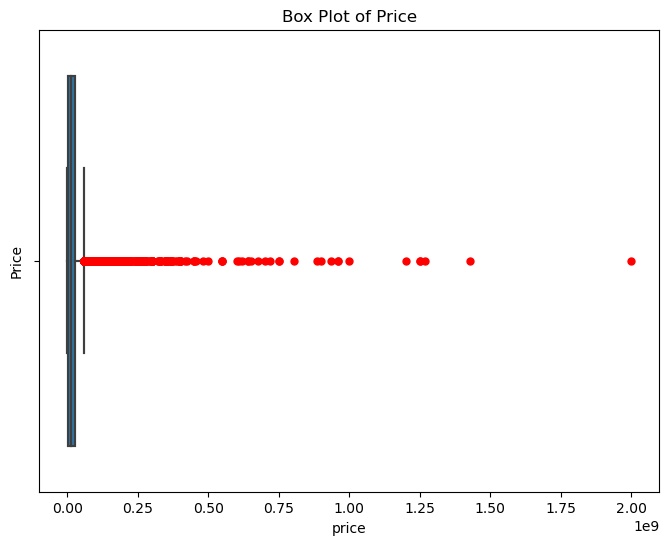

In [100]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the box plot using Seaborn
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['price'], showfliers=False)
plt.title('Box Plot of Price')
plt.ylabel('Price')

# Highlight the outliers using the 'flierprops' parameter
sns.boxplot(x=df['price'], flierprops={'marker': 'o', 'markerfacecolor': 'red', 'markeredgecolor': 'red'})
plt.show()


In [101]:
df = df[~((df['price'] < (Q1 - 1.5 * IQR)) | (df['price'] > (Q3 + 1.5 * IQR)))]
print("\nDataFrame with outliers removed:")
df


DataFrame with outliers removed:


,property_id,location_id,page_url,property_type,price,location,city,province_name,latitude,longitude,baths,area,purpose,bedrooms,date_added,agency,agent
1,482892,48,https://www.zameen.com/Property/lahore_multan_...,House,40000000,Multan Road,Lahore,Punjab,31.431593,74.179980,5.0,1 Kanal,For Sale,5.0,10/6/2018,Khan Estate,mohsinkhan and B
2,555962,75,https://www.zameen.com/Property/eden_eden_aven...,House,9500000,Eden,Lahore,Punjab,31.499348,74.416959,0.0,9 Marla,For Sale,3.0,7/3/2019,Shahum Estate 2,Babar Hameed
3,785289,3102,https://www.zameen.com/Property/gulberg_paf_fa...,House,52000000,Gulberg,Lahore,Punjab,31.495909,74.350569,6.0,1 Kanal,For Sale,5.0,6/2/2019,MATZ Services,Group Captain (R) Tajammul Baig
4,983065,3749,https://www.zameen.com/Property/eme_society_em...,House,32500000,EME Society,Lahore,Punjab,31.439978,74.209685,0.0,1 Kanal,For Sale,5.0,7/3/2019,Sukhera Estate & Builders,Ahmed Sheraz Sukhera
5,983066,3745,https://www.zameen.com/Property/eme_society_em...,House,31500000,EME Society,Lahore,Punjab,31.437744,74.213490,0.0,1 Kanal,For Sale,6.0,7/3/2019,Sukhera Estate & Builders,Ahmed Sheraz Sukhera
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45508,17468968,1587,https://www.zameen.com/Property/dha_phase_3_dh...,Upper Portion,125000,DHA Defence,Lahore,Punjab,31.470949,74.375038,0.0,2 Kanal,For Rent,4.0,7/24/2019,M Ahmad Associates,Rizwan Saeed
45509,17468985,1602,https://www.zameen.com/Property/dha_phase_5_dh...,House,185000,DHA Defence,Lahore,Punjab,31.460919,74.410830,6.0,1 Kanal,For Rent,5.0,7/24/2019,SM Builders & Real Estate Consultants,Ch Umar
45510,17469039,1607,https://www.zameen.com/Property/dha_phase_5_dh...,House,150000,DHA Defence,Lahore,Punjab,31.463665,74.400616,5.0,10 Marla,For Rent,4.0,7/24/2019,Super Homes,Zahid Ali Shah
45511,17469096,1591,https://www.zameen.com/Property/dha_phase_4_dh...,Upper Portion,70000,DHA Defence,Lahore,Punjab,31.463994,74.379544,3.0,1 Kanal,For Rent,3.0,7/24/2019,Safari Estate,CH Muqarab Warraich


# Exploratory Data Analysis

C:\Users\moizm\AppData\Local\Temp\ipykernel_2908\990757472.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


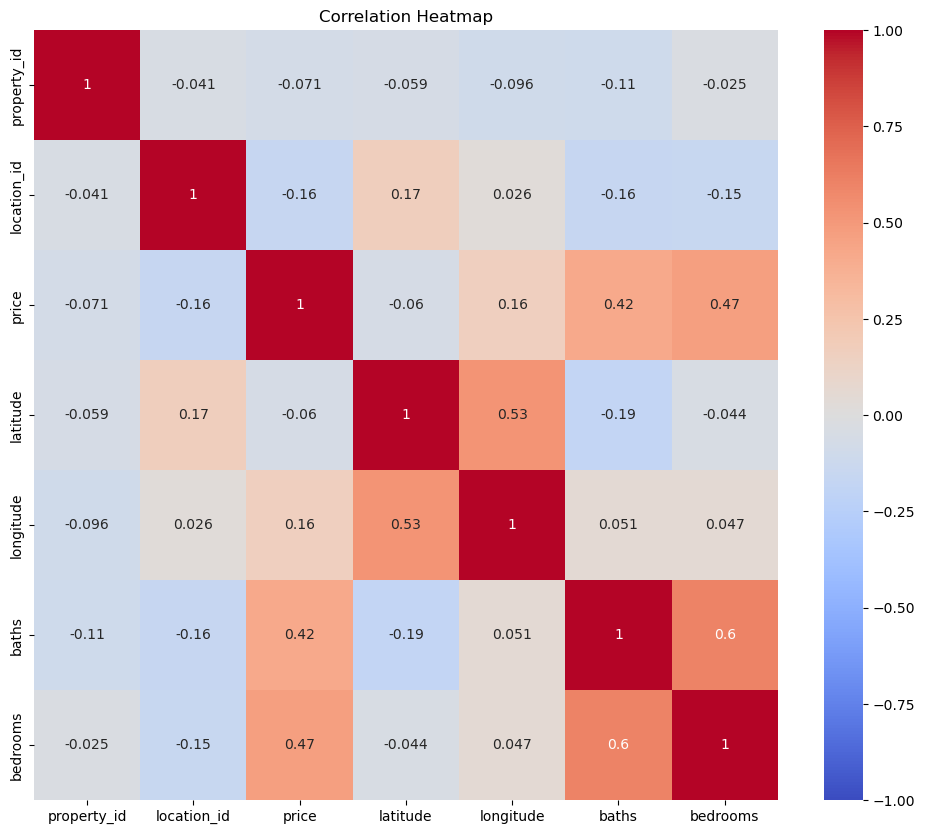

In [102]:
# Assuming you have a DataFrame 'df'
corr_matrix = df.corr()

# Create a correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()


In [103]:
import numpy as np

# Find the minimum correlation value
min_corr = np.min(np.abs(corr_matrix.values))

# Find the indices of the pair of columns with the lowest correlation
row_idx, col_idx = np.where(np.abs(corr_matrix) == min_corr)

# Get the column names of the pair with the lowest correlation
col1 = corr_matrix.columns[row_idx[0]]
col2 = corr_matrix.columns[col_idx[0]]

print(f"The two columns with the lowest correlation are '{col1}' and '{col2}' with a correlation of {min_corr:.2f}")

The two columns with the lowest correlation are 'property_id' and 'bedrooms' with a correlation of 0.03


In [104]:
# Assuming you have a DataFrame 'df' with columns 'agent', 'agency', and 'price'
agent_stats = df.groupby('agent')['price'].agg(['count', 'mean'])
agency_stats = df.groupby('agency')['price'].agg(['count', 'mean'])

# Calculate the correlation between agent count and mean price
agent_corr = agent_stats['count'].corr(agent_stats['mean'])

# Calculate the correlation between agency count and mean price
agency_corr = agency_stats['count'].corr(agency_stats['mean'])

print(f"Correlation between agent count and mean price: {agent_corr:.2f}")
print(f"Correlation between agency count and mean price: {agency_corr:.2f}")

Correlation between agent count and mean price: 0.01
Correlation between agency count and mean price: 0.07


# Feature Engineering

In [105]:

# Assuming you have a DataFrame 'df' with a column 'area'
import re

df['area_sqm'] = df['area'].str.extract(r'(\d+)', expand=False).astype(int)


In [106]:
# Calculate the price per square meter
df['price_per_sqm'] = df['price'] / df['area_sqm']

# Round the 'price_per_sqm' values to 2 decimal places (optional)
df['price_per_sqm'] = df['price_per_sqm'].round(2)

df

,property_id,location_id,page_url,property_type,price,location,city,province_name,latitude,longitude,baths,area,purpose,bedrooms,date_added,agency,agent,area_sqm,price_per_sqm
1,482892,48,https://www.zameen.com/Property/lahore_multan_...,House,40000000,Multan Road,Lahore,Punjab,31.431593,74.179980,5.0,1 Kanal,For Sale,5.0,10/6/2018,Khan Estate,mohsinkhan and B,1,40000000.00
2,555962,75,https://www.zameen.com/Property/eden_eden_aven...,House,9500000,Eden,Lahore,Punjab,31.499348,74.416959,0.0,9 Marla,For Sale,3.0,7/3/2019,Shahum Estate 2,Babar Hameed,9,1055555.56
3,785289,3102,https://www.zameen.com/Property/gulberg_paf_fa...,House,52000000,Gulberg,Lahore,Punjab,31.495909,74.350569,6.0,1 Kanal,For Sale,5.0,6/2/2019,MATZ Services,Group Captain (R) Tajammul Baig,1,52000000.00
4,983065,3749,https://www.zameen.com/Property/eme_society_em...,House,32500000,EME Society,Lahore,Punjab,31.439978,74.209685,0.0,1 Kanal,For Sale,5.0,7/3/2019,Sukhera Estate & Builders,Ahmed Sheraz Sukhera,1,32500000.00
5,983066,3745,https://www.zameen.com/Property/eme_society_em...,House,31500000,EME Society,Lahore,Punjab,31.437744,74.213490,0.0,1 Kanal,For Sale,6.0,7/3/2019,Sukhera Estate & Builders,Ahmed Sheraz Sukhera,1,31500000.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45508,17468968,1587,https://www.zameen.com/Property/dha_phase_3_dh...,Upper Portion,125000,DHA Defence,Lahore,Punjab,31.470949,74.375038,0.0,2 Kanal,For Rent,4.0,7/24/2019,M Ahmad Associates,Rizwan Saeed,2,62500.00
45509,17468985,1602,https://www.zameen.com/Property/dha_phase_5_dh...,House,185000,DHA Defence,Lahore,Punjab,31.460919,74.410830,6.0,1 Kanal,For Rent,5.0,7/24/2019,SM Builders & Real Estate Consultants,Ch Umar,1,185000.00
45510,17469039,1607,https://www.zameen.com/Property/dha_phase_5_dh...,House,150000,DHA Defence,Lahore,Punjab,31.463665,74.400616,5.0,10 Marla,For Rent,4.0,7/24/2019,Super Homes,Zahid Ali Shah,10,15000.00
45511,17469096,1591,https://www.zameen.com/Property/dha_phase_4_dh...,Upper Portion,70000,DHA Defence,Lahore,Punjab,31.463994,74.379544,3.0,1 Kanal,For Rent,3.0,7/24/2019,Safari Estate,CH Muqarab Warraich,1,70000.00


In [107]:
import pandas as pd

# Assuming 'date_added' is in a format that can be parsed by pd.to_datetime()
df['date_added'] = pd.to_datetime(df['date_added'])

# Extract month, quarter, and day of the week
df['month'] = df['date_added'].dt.month
df['quarter'] = df['date_added'].dt.quarter
df['day_of_week'] = df['date_added'].dt.day_name()

# Print the updated DataFrame
df

,property_id,location_id,page_url,property_type,price,location,city,province_name,latitude,longitude,...,purpose,bedrooms,date_added,agency,agent,area_sqm,price_per_sqm,month,quarter,day_of_week
1,482892,48,https://www.zameen.com/Property/lahore_multan_...,House,40000000,Multan Road,Lahore,Punjab,31.431593,74.179980,...,For Sale,5.0,2018-10-06,Khan Estate,mohsinkhan and B,1,40000000.00,10,4,Saturday
2,555962,75,https://www.zameen.com/Property/eden_eden_aven...,House,9500000,Eden,Lahore,Punjab,31.499348,74.416959,...,For Sale,3.0,2019-07-03,Shahum Estate 2,Babar Hameed,9,1055555.56,7,3,Wednesday
3,785289,3102,https://www.zameen.com/Property/gulberg_paf_fa...,House,52000000,Gulberg,Lahore,Punjab,31.495909,74.350569,...,For Sale,5.0,2019-06-02,MATZ Services,Group Captain (R) Tajammul Baig,1,52000000.00,6,2,Sunday
4,983065,3749,https://www.zameen.com/Property/eme_society_em...,House,32500000,EME Society,Lahore,Punjab,31.439978,74.209685,...,For Sale,5.0,2019-07-03,Sukhera Estate & Builders,Ahmed Sheraz Sukhera,1,32500000.00,7,3,Wednesday
5,983066,3745,https://www.zameen.com/Property/eme_society_em...,House,31500000,EME Society,Lahore,Punjab,31.437744,74.213490,...,For Sale,6.0,2019-07-03,Sukhera Estate & Builders,Ahmed Sheraz Sukhera,1,31500000.00,7,3,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45508,17468968,1587,https://www.zameen.com/Property/dha_phase_3_dh...,Upper Portion,125000,DHA Defence,Lahore,Punjab,31.470949,74.375038,...,For Rent,4.0,2019-07-24,M Ahmad Associates,Rizwan Saeed,2,62500.00,7,3,Wednesday
45509,17468985,1602,https://www.zameen.com/Property/dha_phase_5_dh...,House,185000,DHA Defence,Lahore,Punjab,31.460919,74.410830,...,For Rent,5.0,2019-07-24,SM Builders & Real Estate Consultants,Ch Umar,1,185000.00,7,3,Wednesday
45510,17469039,1607,https://www.zameen.com/Property/dha_phase_5_dh...,House,150000,DHA Defence,Lahore,Punjab,31.463665,74.400616,...,For Rent,4.0,2019-07-24,Super Homes,Zahid Ali Shah,10,15000.00,7,3,Wednesday
45511,17469096,1591,https://www.zameen.com/Property/dha_phase_4_dh...,Upper Portion,70000,DHA Defence,Lahore,Punjab,31.463994,74.379544,...,For Rent,3.0,2019-07-24,Safari Estate,CH Muqarab Warraich,1,70000.00,7,3,Wednesday


In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42978 entries, 1 to 45512
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   property_id    42978 non-null  int64         
 1   location_id    42978 non-null  int64         
 2   page_url       42978 non-null  object        
 3   property_type  42978 non-null  object        
 4   price          42978 non-null  int64         
 5   location       42978 non-null  object        
 6   city           42978 non-null  object        
 7   province_name  42978 non-null  object        
 8   latitude       42978 non-null  float64       
 9   longitude      42978 non-null  float64       
 10  baths          42978 non-null  float64       
 11  area           42978 non-null  object        
 12  purpose        42978 non-null  object        
 13  bedrooms       42978 non-null  float64       
 14  date_added     42978 non-null  datetime64[ns]
 15  agency         4297

In [109]:
from sklearn.preprocessing import StandardScaler
import numpy as np

numerical_cols = ['price', 'latitude', 'longitude', 'bedrooms', 'baths', 'area_sqm', 'price_per_sqm']

# Replace infinite values with 0
df[numerical_cols] = df[numerical_cols].replace([float('inf'), -float('inf')], 0)

# Fill NaN values with 0
df[numerical_cols] = df[numerical_cols].fillna(0)

# Create a CustomStandardScaler object
scaler = StandardScaler()

# Fit and transform the numeric columns
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Print the updated DataFrame
df

,property_id,location_id,page_url,property_type,price,location,city,province_name,latitude,longitude,...,purpose,bedrooms,date_added,agency,agent,area_sqm,price_per_sqm,month,quarter,day_of_week
1,482892,48,https://www.zameen.com/Property/lahore_multan_...,House,1.693245,Multan Road,Lahore,Punjab,-0.510014,-1.547627,...,For Sale,0.932532,2018-10-06,Khan Estate,mohsinkhan and B,-1.046823,2.198866,10,4,Saturday
2,555962,75,https://www.zameen.com/Property/eden_eden_aven...,House,-0.365859,Eden,Lahore,Punjab,0.565014,1.031270,...,For Sale,-0.450458,2019-07-03,Shahum Estate 2,Babar Hameed,0.872264,-0.444963,7,3,Wednesday
3,785289,3102,https://www.zameen.com/Property/gulberg_paf_fa...,House,2.503384,Gulberg,Lahore,Punjab,0.510450,0.308788,...,For Sale,0.932532,2019-06-02,MATZ Services,Group Captain (R) Tajammul Baig,-1.046823,3.013512,6,2,Sunday
4,983065,3749,https://www.zameen.com/Property/eme_society_em...,House,1.186908,EME Society,Lahore,Punjab,-0.376974,-1.224366,...,For Sale,0.932532,2019-07-03,Sukhera Estate & Builders,Ahmed Sheraz Sukhera,-1.046823,1.689712,7,3,Wednesday
5,983066,3745,https://www.zameen.com/Property/eme_society_em...,House,1.119396,EME Society,Lahore,Punjab,-0.412419,-1.182959,...,For Sale,1.624027,2019-07-03,Sukhera Estate & Builders,Ahmed Sheraz Sukhera,-1.046823,1.621825,7,3,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45508,17468968,1587,https://www.zameen.com/Property/dha_phase_3_dh...,Upper Portion,-0.998780,DHA Defence,Lahore,Punjab,0.114424,0.575069,...,For Rent,0.241037,2019-07-24,M Ahmad Associates,Rizwan Saeed,-0.806937,-0.512379,7,3,Wednesday
45509,17468985,1602,https://www.zameen.com/Property/dha_phase_5_dh...,House,-0.994730,DHA Defence,Lahore,Punjab,-0.044716,0.964572,...,For Rent,0.932532,2019-07-24,SM Builders & Real Estate Consultants,Ch Umar,-1.046823,-0.504063,7,3,Wednesday
45510,17469039,1607,https://www.zameen.com/Property/dha_phase_5_dh...,House,-0.997092,DHA Defence,Lahore,Punjab,-0.001146,0.853419,...,For Rent,0.241037,2019-07-24,Super Homes,Zahid Ali Shah,1.112150,-0.515603,7,3,Wednesday
45511,17469096,1591,https://www.zameen.com/Property/dha_phase_4_dh...,Upper Portion,-1.002493,DHA Defence,Lahore,Punjab,0.004074,0.624105,...,For Rent,-0.450458,2019-07-24,Safari Estate,CH Muqarab Warraich,-1.046823,-0.511870,7,3,Wednesday


In [110]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Identify the categorical columns
categorical_cols = df.select_dtypes(include='object').columns.tolist()

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Fit and transform the categorical columns
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

df

,property_id,location_id,page_url,property_type,price,location,city,province_name,latitude,longitude,...,purpose,bedrooms,date_added,agency,agent,area_sqm,price_per_sqm,month,quarter,day_of_week
1,482892,48,32004,2,1.693245,294,0,0,-0.510014,-1.547627,...,1,0.932532,2018-10-06,1058,3983,-1.046823,2.198866,10,4,2
2,555962,75,17645,2,-0.365859,128,0,0,0.565014,1.031270,...,1,-0.450458,2019-07-03,1742,614,0.872264,-0.444963,7,3,6
3,785289,3102,19276,2,2.503384,169,0,0,0.510450,0.308788,...,1,0.932532,2019-06-02,1153,1003,-1.046823,3.013512,6,2,3
4,983065,3749,18222,2,1.186908,127,0,0,-0.376974,-1.224366,...,1,0.932532,2019-07-03,1803,225,-1.046823,1.689712,7,3,6
5,983066,3745,18055,2,1.119396,127,0,0,-0.412419,-1.182959,...,1,1.624027,2019-07-03,1803,225,-1.046823,1.621825,7,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45508,17468968,1587,14635,6,-0.998780,112,0,0,0.114424,0.575069,...,0,0.241037,2019-07-24,1136,3116,-0.806937,-0.512379,7,3,6
45509,17468985,1602,15588,2,-0.994730,112,0,0,-0.044716,0.964572,...,0,0.932532,2019-07-24,1649,734,-1.046823,-0.504063,7,3,6
45510,17469039,1607,15795,2,-0.997092,112,0,0,-0.001146,0.853419,...,0,0.241037,2019-07-24,1816,3877,1.112150,-0.515603,7,3,6
45511,17469096,1591,14864,6,-1.002493,112,0,0,0.004074,0.624105,...,0,-0.450458,2019-07-24,1664,659,-1.046823,-0.511870,7,3,6


In [111]:
df = df.drop(['location', 'page_url', 'property_type', 'city', 'month', 'quarter', 'day_of_week', 'province_name', 'agency', 'agent', 'purpose', 'date_added'], axis=1)
df

,property_id,location_id,price,latitude,longitude,baths,area,bedrooms,area_sqm,price_per_sqm
1,482892,48,1.693245,-0.510014,-1.547627,0.735516,5,0.932532,-1.046823,2.198866
2,555962,75,-0.365859,0.565014,1.031270,-1.530377,180,-0.450458,0.872264,-0.444963
3,785289,3102,2.503384,0.510450,0.308788,1.188695,5,0.932532,-1.046823,3.013512
4,983065,3749,1.186908,-0.376974,-1.224366,-1.530377,5,0.932532,-1.046823,1.689712
5,983066,3745,1.119396,-0.412419,-1.182959,-1.530377,5,1.624027,-1.046823,1.621825
...,...,...,...,...,...,...,...,...,...,...
45508,17468968,1587,-0.998780,0.114424,0.575069,-1.530377,73,0.241037,-0.806937,-0.512379
45509,17468985,1602,-0.994730,-0.044716,0.964572,1.188695,5,0.932532,-1.046823,-0.504063
45510,17469039,1607,-0.997092,-0.001146,0.853419,0.735516,26,0.241037,1.112150,-0.515603
45511,17469096,1591,-1.002493,0.004074,0.624105,-0.170841,5,-0.450458,-1.046823,-0.511870


# Model Training

In [112]:
from sklearn.model_selection import train_test_split

# Specify the target variable
y = df['price']

# Drop the target variable from the feature set
X = df.drop('price', axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [113]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

model = LinearRegression()

param_grid = {
    'fit_intercept': [True, False],
    'copy_X': [True, False]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

test_score = best_model.score(X_test, y_test)
print(f'Test R-squared Score: {test_score:.2f}')


Test R-squared Score: 0.78


# Model Evaluation

In [114]:
from sklearn.metrics import mean_absolute_error

y_pred = best_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae:.2f}')

Mean Absolute Error: 0.29


In [115]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')

Mean Squared Error: 0.22


In [116]:
import math

rmse = math.sqrt(mse)
print(f'Root Mean Squared Error: {rmse:.2f}')

Root Mean Squared Error: 0.47


In [119]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / (y_true + 1e-10))) * 100

mape = mean_absolute_percentage_error(y_test, y_pred)
print(f'Mean Absolute Percentage Error: {mape:.2f}%')

Mean Absolute Percentage Error: 103.41%
